Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR

Load data

In [2]:
df = pd.read_csv('CreditDataset.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Providing information on the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


Preprocessing Data

In [4]:
# Identify categorical and numeric columns
# Get categorical columns based on data type 'object'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [5]:
# Get numeric columns excluding 'object' data type
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

In [6]:
# One-hot encoding for categorical features
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [7]:
# Performing fits and transformations on categorical data
encoded_data = encoder.fit_transform(df[categorical_cols])

In [8]:
# Create a DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [9]:
# Merge encoded features with numeric features
# Merge original numeric data with encoded data horizontally
X = pd.concat([df[numerical_cols], encoded_df], axis=1)

In [10]:
# Normalize features using StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

In [11]:
# Perform fits and transformations on numeric features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [12]:
# Assuming 'Class' is the actual name of your target variable column
Y = df['Class']

# Now you can proceed with the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Creating a svm model

In [13]:
# Training the SVR model
# Creating an SVR model with a linear kernel
svr_model = SVR(kernel='linear', C=1.0)

In [15]:
# Train the SVR model using training data
svr_model.fit(X_train, Y_train)

SVR(kernel='linear')

Regression Report

In [16]:
# Making predictions on test data
Y_pred = svr_model.predict(X_test)

In [18]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Making predictions on test data
Y_pred = svr_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(Y_test, Y_pred)  # Calculate MSE
mae = mean_absolute_error(Y_test, Y_pred)  # Calculate MAE
r2 = r2_score(Y_test, Y_pred)  # Calculate R-squared

# Create a regression report
regression_report = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "R-squared (R2)": r2
}

In [20]:
print("Regression Report:")
for metric, value in regression_report.items():
    print(f"{metric}: {value:.4f}")

Regression Report:
Mean Squared Error (MSE): 0.0100
Mean Absolute Error (MAE): 0.0998
R-squared (R2): 0.9521


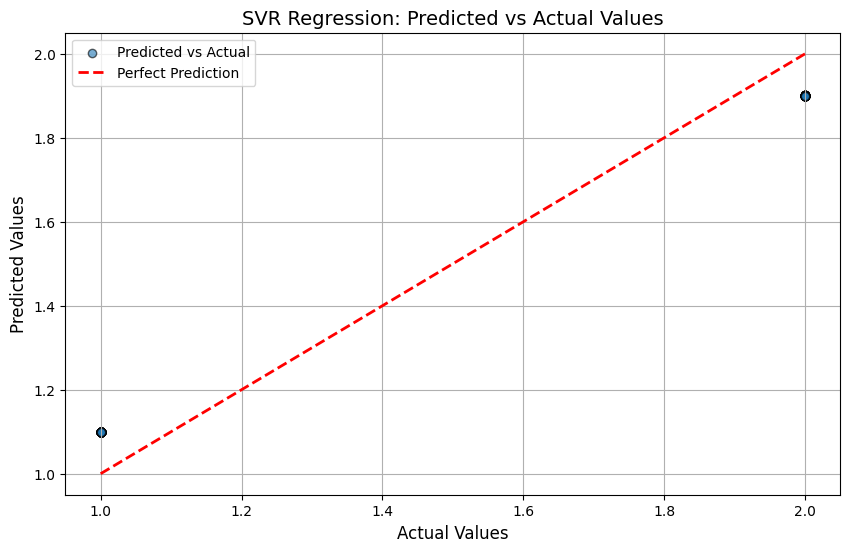

In [23]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6, edgecolors='k', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Add labels and titles
plt.title("SVR Regression: Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Grafik tersebut menunjukkan hasil prediksi model SVR dibandingkan dengan nilai aktual. Titik-titik biru mewakili prediksi model, sedangkan garis merah menunjukkan prediksi sempurna. Titik-titik cukup dekat dengan garis merah, menunjukkan bahwa model memiliki akurasi yang baik meskipun terdapat sedikit error. Model ini mampu memprediksi dengan cukup andal, tetapi tidak sepenuhnya sempurna.